#**GOLD PRICE FORECASTING**
### Hari Prasath

## Business Objective:
Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days.
This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.


In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import streamlit as st

# 1.Load Data and EDA

In [3]:
data = pd.read_csv('Gold_data (1).csv')

In [4]:
data

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [5]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [6]:
data.columns

Index(['date', 'price'], dtype='object')

In [7]:
data.dtypes

date      object
price    float64
dtype: object

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

date     0
price    0
dtype: int64

In [10]:
data.shape

(2182, 2)

In [11]:
print(data.head())

         date    price
0  2016-01-01  2252.60
1  2016-01-02  2454.50
2  2016-01-03  2708.10
3  2016-01-04  2577.80
4  2016-01-05  2597.75


In [12]:
# Print the column names explicitly to check for hidden characters
print(repr(data.columns))

Index(['date', 'price'], dtype='object')


In [13]:
# Rename the column explicitly to 'date'
data.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Now apply the datetime conversion
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

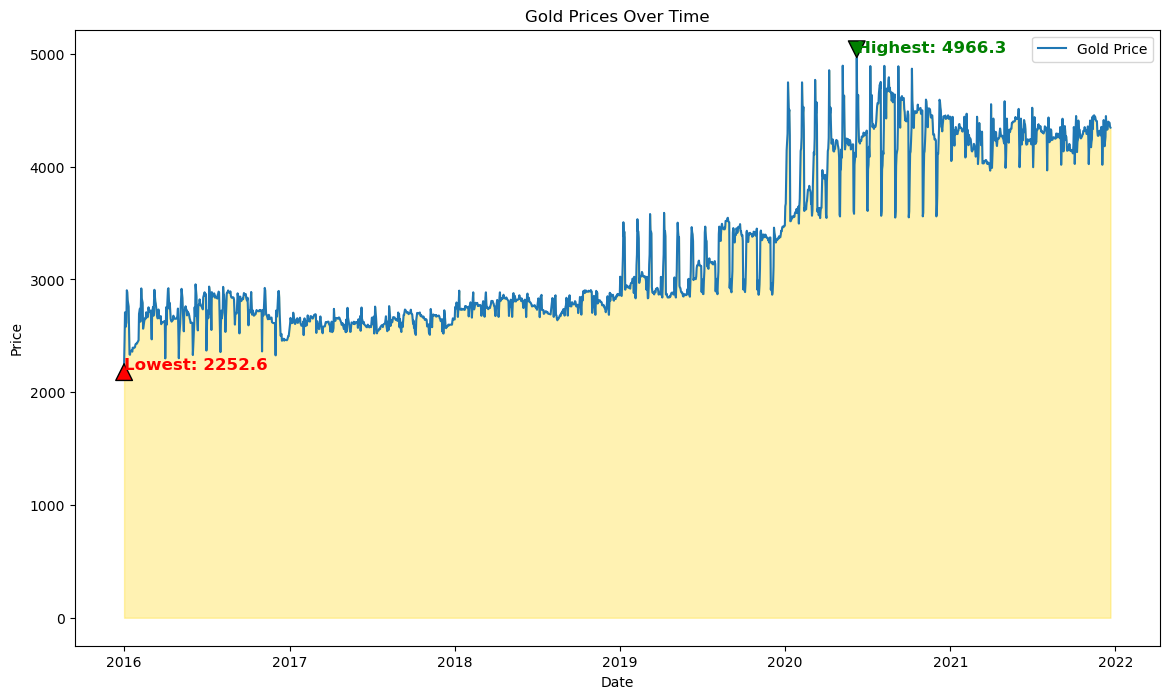

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(data['price'], label='Gold Price')
plt.fill_between(data.index, data['price'], color='gold', alpha=0.3)
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')

# Find max and min prices
max_price = data['price'].max()
min_price = data['price'].min()

# Get corresponding dates from the index (since 'date' is now the index)
max_date = data[data['price'] == max_price].index[0]
min_date = data[data['price'] == min_price].index[0]

# Annotating the highest and lowest points
plt.annotate(f'Highest: {max_price}', xy=(max_date, max_price), xytext=(max_date, max_price + 50),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12, color='green', fontweight='bold')

plt.annotate(f'Lowest: {min_price}', xy=(min_date, min_price), xytext=(min_date, min_price - 50),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red', fontweight='bold')

# Add legend
plt.legend()
plt.show()

# 2.Building a Forecasting Model (ARIMA)

In [17]:
train_size = int(len(data) * 0.8)
train_data, test_data = data['price'][:train_size], data['price'][train_size:]

In [31]:
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

C:\Users\haria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\haria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\haria\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [32]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1745
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10709.972
Date:                Thu, 24 Oct 2024   AIC                          21431.945
Time:                        23:00:52   BIC                          21464.729
Sample:                    01-01-2016   HQIC                         21444.066
                         - 10-10-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0004      0.017      0.022      0.982      -0.034       0.035
ar.L2         -0.1327      0.018     -7.189      0.000      -0.169      -0.096
ar.L3          0.0444      0.022      1.992      0.0

In [33]:
# Forecast the next 30 days
future_forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')

In [34]:
# Forecasting
forecast = model_fit.forecast(steps=30)

DeltaGenerator()

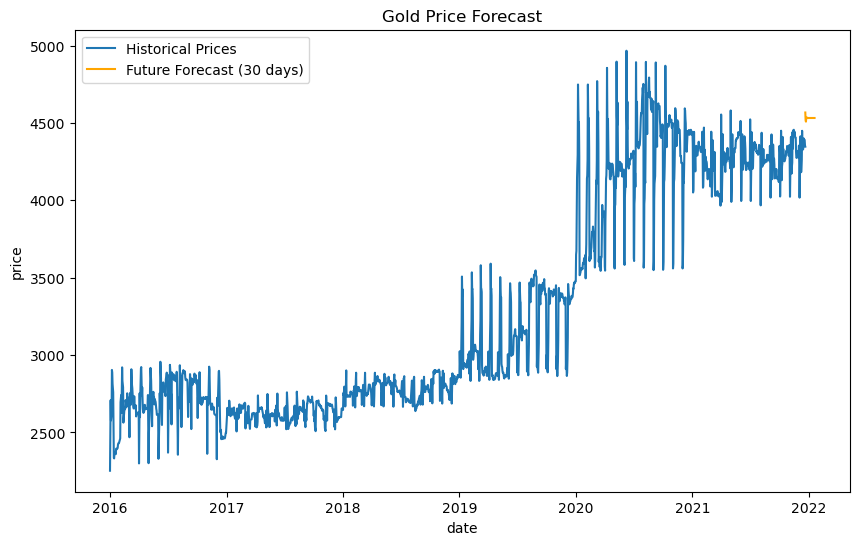

In [39]:
# Plot future forecast
st.subheader('Gold Price Forecast for the Next 30 Days')
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], label='Historical Prices')
plt.plot(future_dates, future_forecast, label='Future Forecast (30 days)', color='orange')
plt.title('Gold Price Forecast')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
st.pyplot(plt)

In [41]:
 # Display forecasted values in a table
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted Price': future_forecast})
st.subheader('Forecasted Prices for the Next 30 Days')
st.write(forecast_df)

In [48]:
csv = forecast_df.to_csv(index=False).encode('utf-8')
st.download_button(
    label="Download Forecasted Data as CSV",
    data=csv,
    file_name='forecasted_gold_prices.csv',
    mime='text/csv',
)

else:
    st.write("Please upload a CSV file to start the forecast.")

SyntaxError: invalid syntax (1090560809.py, line 9)

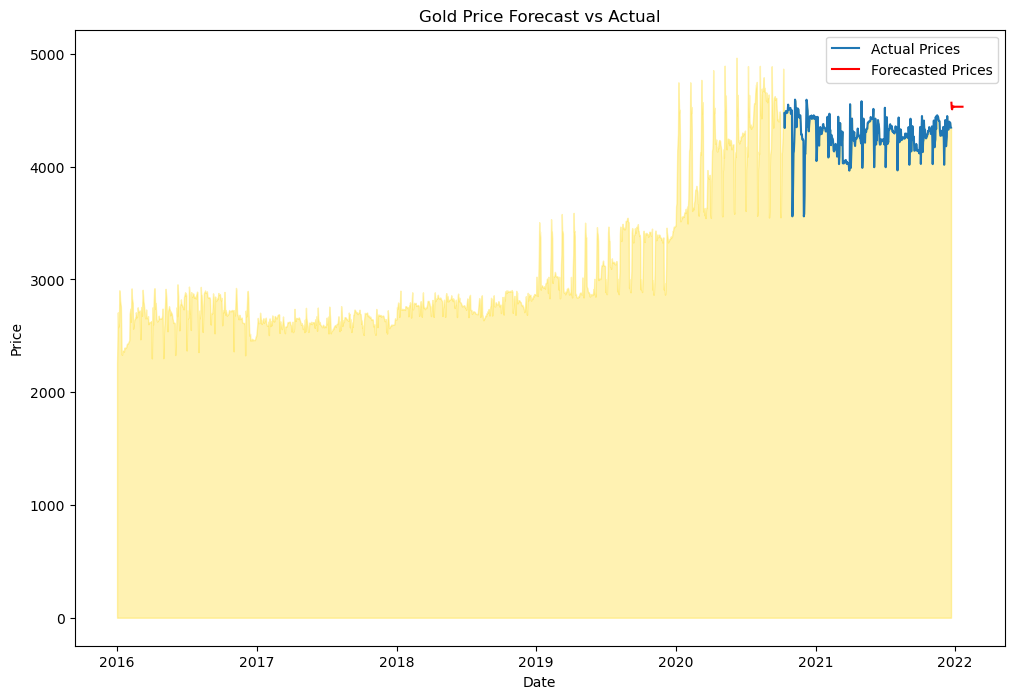

In [21]:
# Plotting the forecast against the test data
plt.figure(figsize=(12, 8))
plt.plot(test_data.index, test_data, label='Actual Prices')

# Create a date range for the forecast
forecast_index = pd.date_range(start=test_data.index[-1], periods=len(forecast) + 1, freq='D')[1:]
# Generate a date range starting the day after the last test data point, for the length of the forecast, with daily frequency. [1:] skips the first element to avoid overlap with the last test data point.


plt.plot(forecast_index, forecast, label='Forecasted Prices', color='red')
# Plot forecast against the newly generated date range

plt.fill_between(data.index, data['price'], color='gold', alpha=0.3)
plt.title('Gold Price Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
# Calculate the error (mean squared error)
# We need to ensure both test_data and forecast have the same length for a valid comparison. We'll use the length of the forecast to slice the test data.

# Here, we're taking only the first 'len(forecast)' elements from test_data
# to align it with the length of 'forecast'.
error = mean_squared_error(test_data[:len(forecast)], forecast)

print(f"Mean Squared Error: {error}")

Mean Squared Error: 92324.98470623867


In [23]:
# Forecast the next 30 days
future_forecast = model_fit.forecast(steps=30)
future_dates = pd.date_range(start=data.index[-1], periods=30, freq='D')

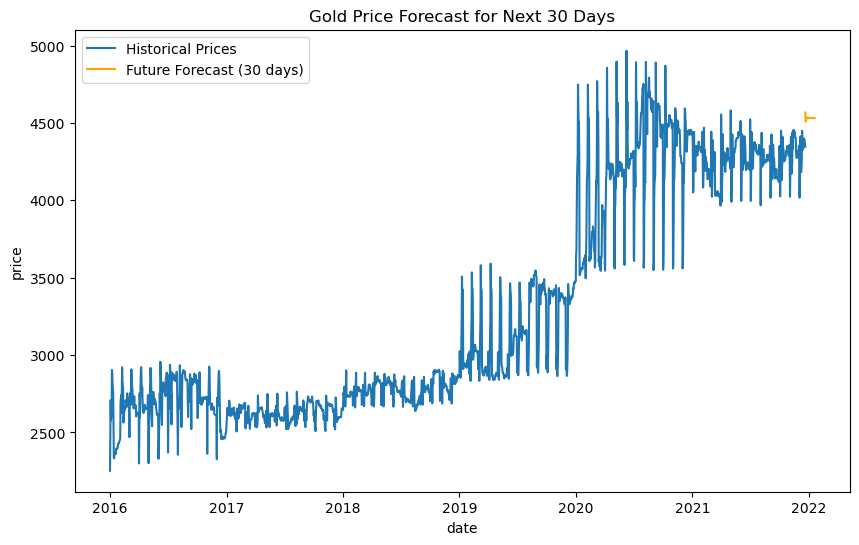

In [25]:
# Plot future forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['price'], label='Historical Prices')
plt.plot(future_dates, future_forecast, label='Future Forecast (30 days)', color='orange')
plt.title('Gold Price Forecast for Next 30 Days')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

In [26]:
print("Forecasted Prices for Next 30 Days:")
print(future_forecast)

Forecasted Prices for Next 30 Days:
2020-10-11    4567.131836
2020-10-12    4516.924044
2020-10-13    4508.232674
2020-10-14    4533.908842
2020-10-15    4531.822612
2020-10-16    4530.030934
2020-10-17    4534.192248
2020-10-18    4532.668777
2020-10-19    4531.147739
2020-10-20    4531.760849
2020-10-21    4531.640312
2020-10-22    4531.440971
2020-10-23    4531.666665
2020-10-24    4531.701869
2020-10-25    4531.647458
2020-10-26    4531.673460
2020-10-27    4531.672613
2020-10-28    4531.654709
2020-10-29    4531.658819
2020-10-30    4531.661338
2020-10-31    4531.658999
2020-11-01    4531.660295
2020-11-02    4531.661127
2020-11-03    4531.660485
2020-11-04    4531.660513
2020-11-05    4531.660629
2020-11-06    4531.660478
2020-11-07    4531.660480
2020-11-08    4531.660529
2020-11-09    4531.660512
Freq: D, Name: predicted_mean, dtype: float64
